# Визначити за допомогою класифікації чи піде працівник з роботи (останній стовпець), використовуючи будь-які незалежні змінні.


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [27]:
employee = pd.read_csv('employee.csv')
employee.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1


In [28]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [29]:
employee.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,0.238083
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,0.425924
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [30]:
employee["salary"] = LabelEncoder().fit_transform(employee.salary)
employee['high_salary'] = pd.cut(employee.salary, bins=[-1,0,3], labels=[1,0])

In [31]:
employee.high_salary.value_counts(normalize=True)


0    0.917528
1    0.082472
Name: high_salary, dtype: float64

In [32]:
y = employee.pop('left')
X = employee.drop(columns=['department', 'salary', 'number_project'])

In [33]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0,stratify=y)

In [34]:
model1 = Pipeline([('scale', StandardScaler()),('lr', LogisticRegression(class_weight='balanced', random_state=0))])
model1.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=0))])

In [35]:
prediction = model1.predict(X_test)
mat = confusion_matrix(y_test, prediction)

In [36]:
mat

array([[867, 276],
       [ 72, 285]], dtype=int64)

In [37]:
model1.score(X_test, y_test)

0.768

<AxesSubplot: >

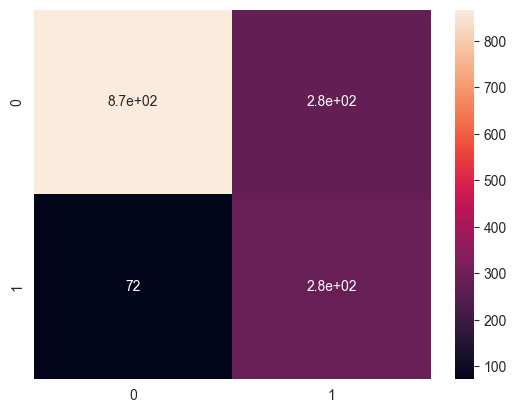

In [38]:
sns.heatmap(mat, annot=True)

In [39]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1143
           1       0.51      0.80      0.62       357

    accuracy                           0.77      1500
   macro avg       0.72      0.78      0.73      1500
weighted avg       0.82      0.77      0.78      1500



In [40]:
model2 = Pipeline([('scale', MinMaxScaler()), ('lr', LogisticRegression(class_weight='balanced', random_state=0))])

In [41]:
search_space = {'lr__C': np.logspace(-1, 1, num=10), 'lr__fit_intercept': [True, False]}

In [42]:
grids = GridSearchCV(model2, search_space, scoring='precision', cv=5).fit(X_train, y_train)
print(classification_report(y_test, grids.predict(X_test)))


              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1143
           1       0.51      0.80      0.62       357

    accuracy                           0.77      1500
   macro avg       0.72      0.78      0.73      1500
weighted avg       0.82      0.77      0.78      1500

